In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\employee.csv")
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9 non-null      float64
 1   income             9 non-null      float64
 2   gender             9 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      float64
dtypes: float64(3), object(3)
memory usage: 804.0+ bytes


# 2. Reset the index as "name" as the index.

In [3]:
data.set_index('name',inplace=True)

In [4]:
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 3. Select rows for specific names Jack Morgan and Josh wills

In [5]:
result=data.loc[['Jack Morgan','Josh Wills']]
result

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [6]:
data[(data['department']=='Finance') | (data['department']=='Sales')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [7]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [8]:
data[(data['performance_score']<700) & (data['performance_score']>500)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [9]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

we got age,income,gender having missing values

we need to find normal distribution or not

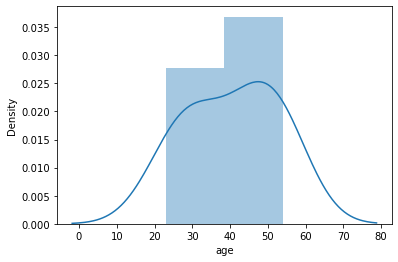

In [10]:
sns.distplot(data.age)
plt.show()

there is small skweness so median can be don to fill age

In [11]:
data['age'].fillna(data['age'].median(),inplace=True)

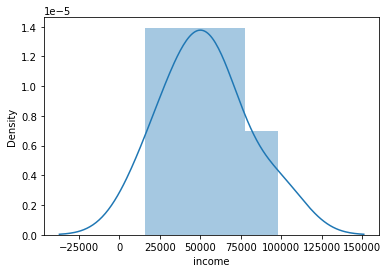

In [12]:
sns.distplot(data.income)
plt.show()

normally distributed so mean can be done

In [13]:
data['income'].fillna(data['income'].mean(),inplace=True)

In [14]:
data['gender'].mode()

0    F
dtype: object

In [15]:
data['gender'].fillna('F',inplace=True)

In [16]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.

<AxesSubplot:xlabel='performance_score'>

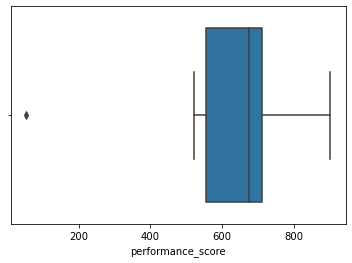

In [17]:
sns.boxplot(data['performance_score'])

we found that there is one outlier

In [18]:
ps=data['performance_score']
q1=np.percentile(ps,25)
q3=np.percentile(ps,75)
IQR=q3-q1
LQR=q1-1.5*(IQR)
UQR=q3+1.5*(IQR)
print(LQR,UQR)
outliers = []
for i in ps: 
        if (i<IQR) | (i>UQR):
            outliers.append(i)
outliers

323.5 943.5


[53]

PERFORMANCE SCORE 53 IS OUTLIER.HERE WE DO NOT DROP OR CHANGE BECAUSE SMALL DATASET IS AVAILABLE

# 9. Check the gender column and do Dummy encoding.

In [19]:
data['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [20]:
pd.get_dummies(data,columns=["gender"])

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,723,1,0
S Kumar,45.0,16000.000000,Finance,G0,520,1,0
Jack Morgan,32.0,35000.000000,Finance,G2,674,0,1
Ying Chin,45.0,65000.000000,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.000000,Sales,G3,649,1,0
James Authur,54.0,52857.142857,Operations,G3,53,1,0
Josh Wills,54.0,52000.000000,Finance,G3,901,1,0
Leo Duck,23.0,98000.000000,Sales,G4,709,0,1


# 10. Do the standard scaling on the feature performance score.

In [21]:
from sklearn import preprocessing

In [22]:
scale=preprocessing.StandardScaler()
scaled_data=scale.fit_transform(data[['performance_score']])
data['performance_score']=scaled_data
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,0.505565
S Kumar,45.0,16000.000000,F,Finance,G0,-0.408053
Jack Morgan,32.0,35000.000000,M,Finance,G2,0.285037
Ying Chin,45.0,65000.000000,F,Sales,G3,-0.246032
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,0.451558
Satyam Sharma,45.0,62000.000000,F,Sales,G3,0.172522
James Authur,54.0,52857.142857,F,Operations,G3,-2.509823
Josh Wills,54.0,52000.000000,F,Finance,G3,1.306668
Leo Duck,23.0,98000.000000,M,Sales,G4,0.442557
